In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions_NLM import estimate_nested_logit, simulate_choice
from functions_geom_DIB import geom_DIB_on_alternatives

In [2]:
# Load data
data = pd.read_csv('../data/restaurants.dat', delimiter=',')
# display every column of the dataframe
pd.set_option('display.max_columns', None)
data

,ID,rating,price,category_Chinese,category_Japanese,category_Korean,category_Indian,category_French,category_Mexican,category_Lebanese,category_Ethiopian,Asian,rest_lat,rest_lon,distance,downtown
0,0,1,4,0,1,0,0,0,0,0,0,1.0,57.994604,42.220972,71.735518,1.0
1,1,2,2,0,0,1,0,0,0,0,0,1.0,93.474454,50.549434,106.267205,0.0
2,2,3,3,0,0,0,0,0,0,0,1,0.0,94.902294,97.830520,136.298409,0.0
3,3,4,1,1,0,0,0,0,0,0,0,1.0,51.027966,69.152206,85.941147,0.0
4,4,4,3,0,0,0,0,0,0,0,0,0.0,37.657349,89.145620,96.773021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,3,0,0,0,0,0,0,0,0,0.0,83.627288,9.511387,84.166441,0.0
96,96,1,1,0,0,0,0,0,0,0,0,0.0,25.475207,92.144641,95.601366,0.0
97,97,4,2,0,0,0,0,0,0,0,1,0.0,12.715702,27.657518,30.440555,1.0
98,98,4,4,1,0,0,0,0,0,0,0,1.0,31.367914,32.303213,45.027143,1.0


In [3]:
# Load data
data2 = pd.read_csv('../data/obs_choice.dat', delimiter=',')
data2 = data2.head(1000)
# display every column of the dataframe
pd.set_option('display.max_columns', None)
data2

,user_lat,user_lon,logit_0,logit_1,logit_2,logit_3,logit_4,nested_0,nested_1,nested_2,nested_3,nested_4,cnl_0,cnl_1,cnl_2,cnl_3,cnl_4
0,29.658623,94.939628,10,37,54,44,75,28,34,10,48,94,44,37,16,70,34
1,11.143086,44.648300,54,87,53,74,70,30,88,93,39,82,54,11,10,39,63
2,59.937774,79.235164,35,42,40,76,21,12,12,99,16,44,35,30,44,82,26
3,89.859393,20.279733,82,94,51,54,34,9,50,26,35,39,10,76,82,44,78
4,22.618975,25.913081,40,43,37,30,23,40,82,35,35,97,2,35,42,91,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,96.369427,18.530725,21,9,88,39,11,42,44,42,12,46,85,42,91,97,10
996,98.913197,70.364056,27,44,32,62,79,18,23,40,10,19,89,25,12,64,94
997,98.909998,64.201329,89,32,30,6,89,54,19,56,26,73,26,44,30,53,25
998,35.406275,75.205190,30,11,95,82,78,14,66,44,37,25,37,76,44,26,44


In [4]:
# min and max values of logit_0
min_logit_0 = data2['logit_0'].min()
max_logit_0 = data2['logit_0'].max()
print('min_logit_0:', min_logit_0)
print('max_logit_0:', max_logit_0)

min_logit_0: 0
max_logit_0: 99


In [5]:
beta_chinese_0 = 0.7398629473258139
beta_ethiopian_0 = 0.47607016320852397
beta_french_0 = 0.4901602538830622
beta_indian_0 = 0.8711323391590003
beta_japanese_0 = 1.0173430789451348
beta_korean_0 = 0.8460200697299891
beta_lebanese_0 = 0.5083384000422749
beta_log_dist_0 = -0.6205966147051617
beta_mexican_0 = 1.177089149899137
beta_price_0 = -0.39938804750508633
beta_rating_0 = 0.7467759860400736


In [6]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Compute differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Apply Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


In [7]:
# Compute the utilities for the 100 restaurant for one individual using the logit_0
user_0_lat = data2['user_lat'][0]
user_0_lon = data2['user_lon'][0]
rest_0_lat = data['rest_lat']
rest_0_lon = data['rest_lon']

# Initialize a list to store utilities for each restaurant
utilities = []

for i in range(100):
    distance = haversine(user_0_lat, user_0_lon, rest_0_lat[i], rest_0_lon[i])
    #Compute U_0 for restaurant 0, U_1 for restaurant 1, etc...
    U_i = beta_chinese_0 * data['category_Chinese'][i] + beta_ethiopian_0 * data['category_Ethiopian'][i] + \
           beta_french_0 * data['category_French'][i] + beta_indian_0 * data['category_Indian'][i] + \
           beta_japanese_0 * data['category_Japanese'][i] + beta_korean_0 * data['category_Korean'][i] + \
           beta_lebanese_0 * data['category_Lebanese'][i] + beta_mexican_0 * data['category_Mexican'][i] + \
           beta_price_0 * data['price'][i] + beta_rating_0 * data['rating'][i] + \
           beta_log_dist_0 * np.log(distance)
    
    # Append the utility to the list
    utilities.append(U_i)
print(utilities)

[-5.129028719050075, -3.952768441553173, -3.998449418691348, -1.6803400329574263, -2.5211440370080775, -5.9017663675569585, -4.385152678262774, -2.6247242279406393, -2.590583510028779, -1.6507601731099997, -1.641063875929163, -2.4548767850574587, -2.7357203384048643, -4.016865592763913, -2.9480766176867474, -4.227909629393588, -0.7153856864369512, -2.4579621421663713, -1.9968135733617367, -2.7399345425070845, -5.7023540163949455, -1.6550279645906105, -3.6798975164790466, -3.3487820761455835, -2.2054058311549687, -0.9077938793775018, -2.108689718486471, -2.019889230652015, -4.652100480723551, -1.609969479705741, -0.7290647904238048, -1.4924178388534837, -2.021965892375675, -3.1903171996654223, -0.3048330386405427, -1.5836284965426075, -2.2647102610869654, -0.9513222860213233, -4.2733606137533435, -2.0127457796452615, -0.861558880032816, -3.393284351908599, -1.7164606331754633, -4.923504251139288, -0.5252741685143532, -3.1652852974137575, -2.690178698290552, -3.2003459214561882, -4.16592

In [8]:
# Initialize a dictionary to store utilities for all users
all_utilities = {}

# Iterate over each user
for user_idx in range(1000):
    # Get the latitude and longitude of the current user
    user_lat = data2['user_lat'][user_idx]
    user_lon = data2['user_lon'][user_idx]
    rest_lat = data['rest_lat']
    rest_lon = data['rest_lon']
    
    # Initialize a list to store utilities for the current user
    user_utilities = []
    
    # Iterate over each restaurant
    for i in range(100):
        # Compute the distance between the user and the restaurant
        distance = haversine(user_lat, user_lon, rest_lat[i], rest_lon[i])
        
        # Compute utility for the ith restaurant for the current user
        U_i = beta_chinese_0 * data['category_Chinese'][i] + \
              beta_ethiopian_0 * data['category_Ethiopian'][i] + \
              beta_french_0 * data['category_French'][i] + \
              beta_indian_0 * data['category_Indian'][i] + \
              beta_japanese_0 * data['category_Japanese'][i] + \
              beta_korean_0 * data['category_Korean'][i] + \
              beta_lebanese_0 * data['category_Lebanese'][i] + \
              beta_mexican_0 * data['category_Mexican'][i] + \
              beta_price_0 * data['price'][i] + \
              beta_rating_0 * data['rating'][i] + \
              beta_log_dist_0 * np.log(distance)
        
        # Append the utility to the list for the current user
        user_utilities.append(U_i)
    
    # Store the list of utilities for the current user in the dictionary
    all_utilities[user_idx] = user_utilities

# Now 'all_utilities' is a dictionary where keys are user indices and values are lists of utilities
# You can access the utilities associated with any specific user by using their index as the key, for example:
# utilities_for_user_3000 = all_utilities[3000]


In [9]:
# Initialize a dictionary to store utilities for all users
all_probabilities = {}

# Iterate over each user
for user_idx in range(1000):
    user_utilities = all_utilities[user_idx]

    # Compute the sum of exponentials of utilities
    sum_exp_utilities = sum([math.exp(U_i) for U_i in user_utilities])

    # Compute the probability of choosing each restaurant
    user_probabilities = [math.exp(U_i) / sum_exp_utilities for U_i in user_utilities]

    # Store the list of probabilities for the current user in the dictionary
    all_probabilities[user_idx] = user_probabilities

In [10]:
# make a dataset with the probabilities of each restaurant for each user, restaurant in columns, users in rows
df_probabilities = pd.DataFrame(all_probabilities)

#transpose the dataframe
df_probabilities = df_probabilities.T

#change the name of each column for P_i with i the number of the restaurant
df_probabilities.columns = ['P_' + str(i) for i in range(100)]

#add a column with the choice of each user
df_probabilities['choice'] = data2['logit_0']

#display the dataframe
df_probabilities

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20,P_21,P_22,P_23,P_24,P_25,P_26,P_27,P_28,P_29,P_30,P_31,P_32,P_33,P_34,P_35,P_36,P_37,P_38,P_39,P_40,P_41,P_42,P_43,P_44,P_45,P_46,P_47,P_48,P_49,P_50,P_51,P_52,P_53,P_54,P_55,P_56,P_57,P_58,P_59,P_60,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70,P_71,P_72,P_73,P_74,P_75,P_76,P_77,P_78,P_79,P_80,P_81,P_82,P_83,P_84,P_85,P_86,P_87,P_88,P_89,P_90,P_91,P_92,P_93,P_94,P_95,P_96,P_97,P_98,P_99,choice
0,0.000501,0.001624,0.001551,0.015754,0.006796,0.000231,0.001054,0.006127,0.006340,0.016227,0.016385,0.007261,0.005483,0.001523,0.004434,0.001233,0.041348,0.007239,0.011480,0.005460,0.000282,0.016158,0.002133,0.002970,0.009319,0.034111,0.010265,0.011218,0.000807,0.016902,0.040786,0.019011,0.011195,0.003480,0.062339,0.017353,0.008782,0.032658,0.001178,0.011298,0.035725,0.002841,0.015195,0.000615,0.050006,0.003568,0.005739,0.003445,0.001312,0.001791,0.008779,0.005069,0.030996,0.017987,0.006680,0.013476,0.000400,0.000786,0.004509,0.004349,0.002716,0.001423,0.003495,0.012163,0.001724,0.000324,0.004858,0.002966,0.003338,0.003819,0.018980,0.000601,0.010393,0.007682,0.000533,0.002204,0.024443,0.004365,0.013818,0.015253,0.004745,0.003718,0.018615,0.003089,0.001906,0.037640,0.003670,0.004186,0.016692,0.012175,0.003560,0.007691,0.001671,0.012403,0.030022,0.002141,0.002410,0.004932,0.003243,0.006833,10
1,0.000562,0.001568,0.001538,0.013685,0.002816,0.000228,0.001053,0.013986,0.005592,0.019099,0.010799,0.021871,0.005213,0.001928,0.005527,0.001410,0.018997,0.010575,0.021994,0.005043,0.000848,0.015087,0.003869,0.002923,0.016375,0.019228,0.009978,0.010875,0.000775,0.012780,0.044558,0.004546,0.034222,0.004535,0.022070,0.015918,0.009566,0.059781,0.001603,0.011375,0.025016,0.002375,0.014429,0.000516,0.033944,0.005121,0.016092,0.004819,0.002353,0.007433,0.015713,0.004829,0.008801,0.013246,0.014662,0.015210,0.000554,0.000732,0.004282,0.002477,0.005854,0.002043,0.003463,0.012947,0.001688,0.000329,0.003418,0.002290,0.003227,0.003479,0.031960,0.000601,0.006979,0.005037,0.001579,0.003267,0.025336,0.006922,0.008775,0.011644,0.005785,0.015118,0.015881,0.011981,0.002084,0.006464,0.004387,0.007584,0.020347,0.011615,0.012123,0.007456,0.001635,0.016861,0.027789,0.002152,0.000673,0.012978,0.006193,0.013056,54
2,0.000756,0.002110,0.002003,0.025617,0.003378,0.000324,0.001540,0.005667,0.017843,0.022468,0.007730,0.006166,0.007660,0.001959,0.005069,0.001657,0.015738,0.008308,0.011641,0.008457,0.000234,0.020998,0.001539,0.003725,0.006469,0.015342,0.014401,0.016801,0.001025,0.009127,0.063094,0.004924,0.010022,0.004345,0.022393,0.027221,0.013548,0.023374,0.000767,0.017836,0.066794,0.006402,0.019721,0.001155,0.031190,0.004070,0.004974,0.004131,0.001233,0.001491,0.008924,0.006666,0.007988,0.009690,0.006091,0.018920,0.000472,0.001009,0.005970,0.004189,0.002424,0.001645,0.005545,0.019937,0.002264,0.000455,0.003548,0.001580,0.004497,0.005738,0.014919,0.000960,0.005071,0.003920,0.000480,0.002534,0.036201,0.004748,0.014340,0.030738,0.006249,0.003172,0.036334,0.002592,0.002734,0.006574,0.005043,0.003420,0.022614,0.018143,0.002770,0.010550,0.002471,0.009396,0.043945,0.002974,0.000612,0.004472,0.003279,0.006757,35
3,0.000416,0.006368,0.005116,0.008677,0.001550,0.000757,0.002198,0.003812,0.005450,0.016385,0.004259,0.003977,0.021114,0.001431,0.002546,0.000798,0.008732,0.006036,0.007554,0.009954,0.000136,0.045250,0.000876,0.007583,0.003783,0.008806,0.037863,0.023843,0.002300,0.004813,0.030838,0.002426,0.006091,0.003239,0.010947,0.029892,0.006508,0.013380,0.000438,0.016375,0.019554,0.002615,0.050861,0.000633,0.014972,0.003148,0.002916,0.002778,0.000904,0.000886,0.005274,0.020801,0.004248,0.005799,0.004157,0.016050,0.000269,0.001991,0.019075,0.001789,0.001658,0.001218,0.005333,0.011334,0.008049,0.000734,0.001616,0.000929,0.114409,0.007225,0.008202,0.000865,0.002918,0.002025,0.000306,0.001734,0.038280,0.003428,0.005398,0.011412,0.004854,0.001999,0.019529,0.001637,0.001257,0.003436,0.003497,0.

In [11]:
# Compute AIC, BIC and log-likelihood for the model
log_likelihood = 0
n_parameters = 11
n_observations = 1000

# Iterate over each user
for user_idx in range(1000):
    user_probabilities = all_probabilities[user_idx]
    user_choice = data2['logit_0'][user_idx]
    log_likelihood += math.log(user_probabilities[user_choice])

AIC = -2 * log_likelihood + 2 * n_parameters
BIC = -2 * log_likelihood + n_parameters * math.log(n_observations)

print('AIC:', AIC)
print('BIC:', BIC)
print('Log-likelihood:', log_likelihood)

AIC: 8160.713920686444
BIC: 8214.699228755248
Log-likelihood: -4069.356960343222


In [12]:
df_input = data2[['user_lat', 'user_lon']]
# Calculate frequencies and probabilities
vector_counts = df_input.value_counts().reset_index(name='Frequency')
vector_counts['Probability'] = vector_counts['Frequency'] / len(df_input)

# Creating a tuple of attributes to facilitate mapping
vector_counts['tuple'] = vector_counts[['user_lat', 'user_lon']].apply(tuple, axis=1)
probability_map = vector_counts.set_index('tuple')['Probability'].to_dict()

# Assign the probability to each row based on its tuple of attributes
df_input['Probability'] = df_input.apply(lambda row: probability_map[tuple(row)], axis=1)

/var/folders/gk/16047hxn3hdgt8s5qmq_gnqh0000gp/T/ipykernel_1054/842991067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['Probability'] = df_input.apply(lambda row: probability_map[tuple(row)], axis=1)


In [13]:
# Computation of p(x,y)
p_x = df_input['Probability'].values

p_y_given_x = np.array(list(all_probabilities.values()))
p_xy = p_x[:, np.newaxis] * p_y_given_x

# Normalize p_xy 
p_xy /= p_xy.sum()

# Define epsilon value
epsilon = 1e-20

# Add epsilon to elements equal to 0
p_xy[p_xy == 0] += epsilon

/Users/alex/Documents/GitHub/Semester_project_information_cluser/notebook-restaurant/functions_IB.py:22: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q)
/Users/alex/Documents/GitHub/Semester_project_information_cluser/notebook-restaurant/functions_geom_DIB.py:359: RuntimeWarning: divide by zero encountered in log
  l_beta_xt = np.log(q_t) - beta * d_xt


Iteration: 1 out of 200
Objective function value: 0.16567684854566256
H(T) =  1.6094379124341005
I(T;Y) =  0.0009625073759256253
Iteration: 2 out of 200
Objective function value: 0.975148572143314
H(T) =  1.3090157953711268
I(T;Y) =  0.00022257814881854188
Iteration: 3 out of 200
Objective function value: 0.9609861220043614
H(T) =  1.072852766751855
I(T;Y) =  7.457776316499576e-05
Iteration: 4 out of 200
Objective function value: 0.9567116966778989
H(T) =  0.9941317572120979
I(T;Y) =  2.494670702279933e-05
Iteration: 5 out of 200
Objective function value: 0.9553276813699485
H(T) =  0.9678914206988454
I(T;Y) =  8.375826219264582e-06
Iteration: 6 out of 200
Objective function value: 0.9548620762696101
H(T) =  0.9591446418610947
I(T;Y) =  2.8550437276564367e-06
Iteration: 7 out of 200
Objective function value: 0.993341728601963
H(T) =  0.9947348669266642
I(T;Y) =  9.287588831341509e-07
Iteration: 8 out of 200
Objective function value: 0.967514336243317
H(T) =  0.9680924572703675
I(T;Y) = 

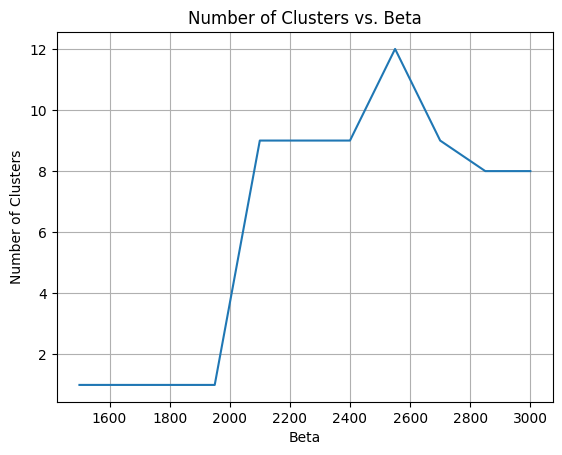

In [19]:
betas = np.linspace(1500, 3000, 11)
# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB_on_alternatives(p_xy, max_iter=200, beta=beta, threshold=1e-20)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

In [15]:
q_t_given_x, q_t, q_y_given_t = geom_DIB_on_alternatives(p_xy, beta=8500, max_iter=200, threshold=1e-20)

Iteration: 1 out of 200
Objective function value: -6.5718747829337145
H(T) =  1.6094379124341005
I(T;Y) =  0.0009625073759256253
Iteration: 2 out of 200
Objective function value: -2.5930422358447203
H(T) =  1.4978661367769954
I(T;Y) =  0.00048128333795549594
Iteration: 3 out of 200
Objective function value: -0.6036680372470826
H(T) =  1.442080248948443
I(T;Y) =  0.00024067626896417949
Iteration: 4 out of 200
Objective function value: 0.4348713063023564
H(T) =  1.1172075846109604
I(T;Y) =  8.027485627160047e-05
Iteration: 5 out of 200
Objective function value: 0.7809949883213738
H(T) =  1.0089166964984662
I(T;Y) =  2.6814318609069687e-05
Iteration: 6 out of 200
Objective function value: 0.8963134515137932
H(T) =  0.9728197337943016
I(T;Y) =  9.000739091824528e-06
Iteration: 7 out of 200
Objective function value: 0.9752718227228919
H(T) =  0.9988373945066266
I(T;Y) =  2.772420209851134e-06
Iteration: 8 out of 200
Objective function value: 0.9609602303256539
H(T) =  0.9694599664636885
I(T

In [16]:
import re

# Define a function to extract the number from the column name
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Search for one or more digits in the column name
    if match:
        return int(match.group())  # Return the first occurrence of digits as an integer
    else:
        return None  # Return None if no digits are found

In [17]:
# Calculate the number of clusters
column_sum = np.sum(q_t_given_x, axis=0)
num_clusters = np.count_nonzero(column_sum)
print('Number of clusters :', num_clusters)


Number of clusters : 13


In [18]:

# Count the number of observations in each cluster
df_probabilities['cluster'] = np.argmax(q_t_given_x, axis=1)
print('\n', df_probabilities['cluster'].value_counts())

# number of each alternative 1, 2, 3, 4, 5 in each cluster 
cluster_counts = df_probabilities.groupby(['cluster', 'choice']).size().unstack(fill_value=0)
print('\n', cluster_counts)

# maximal probability for each individual in the dataframe 
df_probabilities['max_proba'] = df_probabilities[['P_0', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99']].max(axis=1)
cluster_counts2 = df_probabilities.groupby(['cluster', 'max_proba']).size().unstack(fill_value=0)
print('\n', cluster_counts2)


 cluster
4     136
2     110
1     106
97     98
0      97
98     82
93     71
99     64
96     64
92     58
94     52
95     35
3      27
Name: count, dtype: int64

 choice   0   1   2   3   4   7   8   9   10  11  12  13  14  15  16  17  18  \
cluster                                                                       
0         1   0   0   1   1   3   0   1   1   1   2   0   1   0   3   0   3   
1         0   0   0   1   0   0   1   0   1   1   1   0   0   0   6   0   3   
2         0   3   1   1   0   0   2   2   1   1   1   0   1   1   1   2   2   
3         0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   1   2   
4         0   0   0   2   0   5   0   4   2   3   0   0   0   0   1   2   1   
92        0   0   0   2   1   0   0   2   0   1   1   0   1   0   3   1   1   
93        0   0   0   1   0   1   0   5   0   0   0   0   1   0   2   1   1   
94        0   1   0   1   0   0   1   2   1   1   1   0   0   0   0   0   2   
95        0   0   0   1   0   0   0   1   